# Problem Statement
## I decided to treat this as a classification problem by creating a new binary variable affair (did the woman have at least one affair?) and trying to predict the classification for each woman.

The dataset I chose is the affairs dataset that comes with Statsmodels. It was derived
from a survey of women in 1974 by Redbook magazine, in which married women were
asked about their participation in extramarital affairs. More information about the study
is available in a 1978 paper from the Journal of Political Economy.

In [60]:
# import libraries
import numpy as np  # numeric calculations
import pandas as pd # dataframes
import statsmodels.api as sm # statsmodel
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
data = sm.datasets.fair.load_pandas().data

In [61]:
data.shape

(6366, 9)

In [133]:
data.to_csv("Affair.csv")

In [62]:
data.describe()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
count,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000
mean,4.109645,29.082862,9.009425,1.396874,2.426170,14.209865,3.424128,3.850141,0.705374
std,0.961430,6.847882,7.280120,1.433471,0.878369,2.178003,0.942399,1.346435,2.203374
min,1.000000,17.500000,0.500000,0.000000,1.000000,9.000000,1.000000,1.000000,0.000000
25%,4.000000,22.000000,2.500000,0.000000,2.000000,12.000000,3.000000,3.000000,0.000000
50%,4.000000,27.000000,6.000000,1.000000,2.000000,14.000000,3.000000,4.000000,0.000000
75%,5.000000,32.000000,16.500000,2.000000,3.000000,16.000000,4.000000,5.000000,0.484848
max,5.000000,42.000000,23.000000,5.500000,4.000000,20.000000,6.000000,6.000000,57.599991


In [5]:
data.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [6]:
data.loc[data['affairs']<=1]

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
6,5.0,37.0,23.0,5.5,2.0,12.0,5.0,4.0,0.852174
12,3.0,37.0,16.5,5.5,1.0,12.0,2.0,3.0,0.484848
22,3.0,42.0,23.0,5.5,3.0,12.0,5.0,4.0,0.532609
23,2.0,27.0,9.0,2.0,4.0,20.0,3.0,4.0,0.622222
24,4.0,27.0,6.0,1.0,2.0,12.0,5.0,4.0,0.583333
26,2.0,27.0,6.0,2.0,2.0,12.0,2.0,5.0,0.166667
27,5.0,37.0,13.0,1.0,3.0,12.0,3.0,4.0,0.615385
32,3.0,37.0,16.5,3.0,3.0,14.0,3.0,2.0,0.484848


## Creating Target variable with binary values  0 and 1(where o stands for no affairs and 1 for having affairs

In [63]:
data['affair'] = (data.affairs > 0).astype(int)

In [64]:
data.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1


In [65]:
# how many 0 and 1 are there in the affair column.
data['affair'].value_counts()

0    4313
1    2053
Name: affair, dtype: int64

In [66]:
data.info() # .info method will tell theh datatype and null values of each of the column in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6366 entries, 0 to 6365
Data columns (total 10 columns):
rate_marriage      6366 non-null float64
age                6366 non-null float64
yrs_married        6366 non-null float64
children           6366 non-null float64
religious          6366 non-null float64
educ               6366 non-null float64
occupation         6366 non-null float64
occupation_husb    6366 non-null float64
affairs            6366 non-null float64
affair             6366 non-null int32
dtypes: float64(9), int32(1)
memory usage: 472.6 KB


### check missing values in the data

In [67]:
data.isnull().sum() # column name and number of nulls 

rate_marriage      0
age                0
yrs_married        0
children           0
religious          0
educ               0
occupation         0
occupation_husb    0
affairs            0
affair             0
dtype: int64

## visualization

In [59]:
data.columns

Index(['rate_marriage', 'age', 'yrs_married', 'children', 'religious', 'educ',
       'occupation', 'occupation_husb'],
      dtype='object')

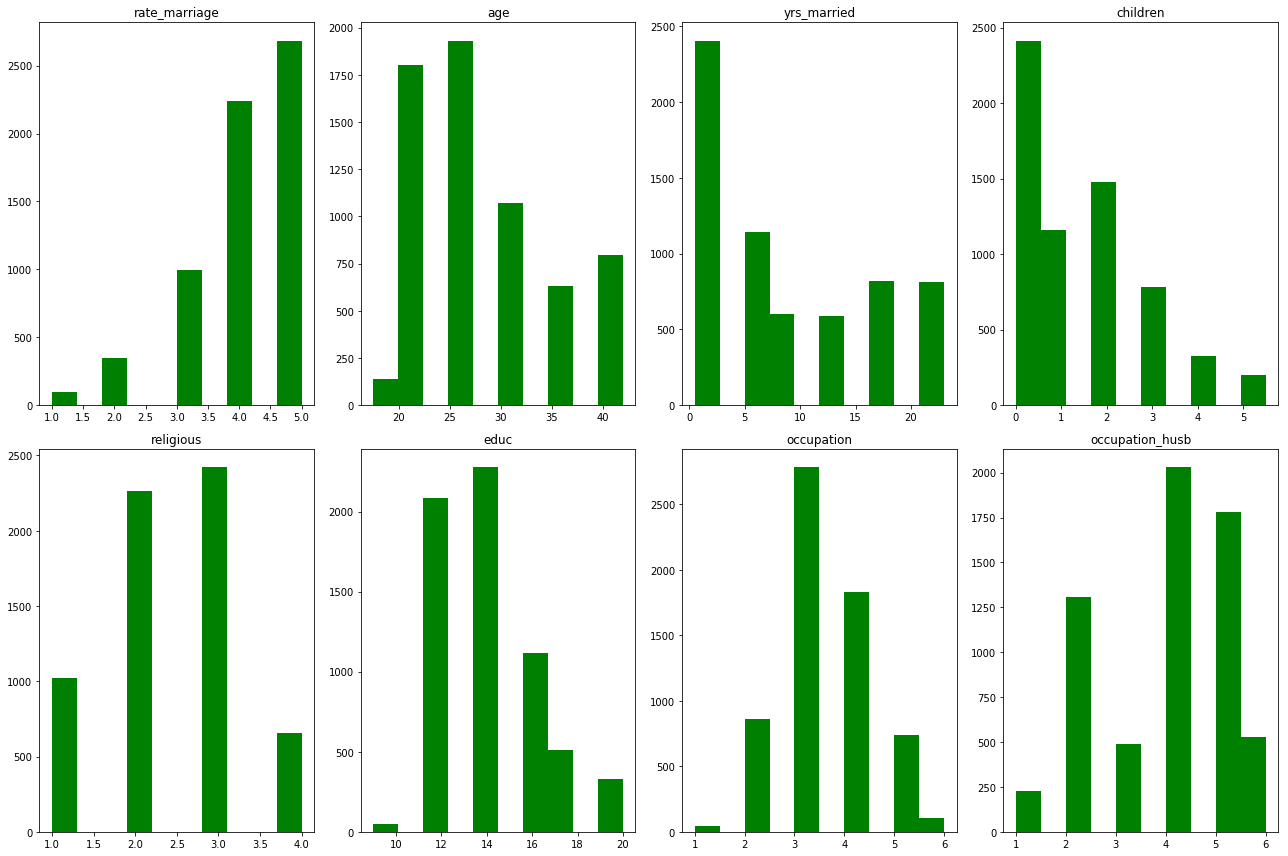

In [77]:
columns=list(data.columns.values)
fig,axes=plt.subplots(2,4, figsize=(18,12))
for i, ax in enumerate(axes.flat):
    if i<10:
        ax.hist(data[columns[i]],color='green')
        ax.set_title(columns[i])
plt.tight_layout()

In [69]:
data.groupby('affair').mean()
# affair =0 means there is no affair and rating are good (>=4)
#and womens having affair have rated thier marriage <=3.5 on an average 

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
affair,,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758,0.000000
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559,2.187243


In [70]:
data.groupby('rate_marriage').mean()


,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
rate_marriage,,,,,,,,,
1.0,33.823232,13.914141,2.308081,2.343434,13.848485,3.232323,3.838384,1.201671,0.747475
2.0,30.471264,10.727011,1.735632,2.330460,13.864943,3.327586,3.764368,1.615745,0.635057
3.0,30.008056,10.239174,1.638469,2.308157,14.001007,3.402820,3.798590,1.371281,0.550856
4.0,28.856601,8.816905,1.369536,2.400981,14.144514,3.420161,3.835861,0.674837,0.322926
5.0,28.574702,8.311662,1.252794,2.506334,14.399776,3.454918,3.892697,0.348174,0.181446


### In short, Affair is inversely proportional to the marriage ratings

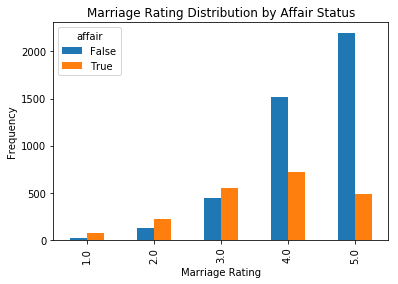

In [72]:
#Bar plot of marriage rating grouped by affair (True or False)
pd.crosstab(data.rate_marriage, data.affair.astype(bool)).plot(kind='bar')
plt.title('Marriage Rating Distribution by Affair Status')
plt.xlabel('Marriage Rating')
plt.ylabel('Frequency')
plt.show()

In [75]:
#pivot table showing the years of married and affair status
affair_yrs_married = pd.crosstab(data.yrs_married, data.affair.astype(bool))
affair_yrs_married

affair,False,True
yrs_married,,
0.5,354,16
2.5,1595,439
6.0,754,387
9.0,348,254
13.0,347,243
16.5,449,369
23.0,466,345


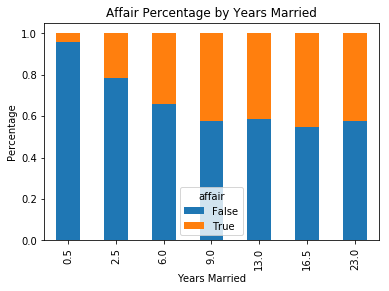

In [76]:
#Stacked barplot to look at the percentage of women having affairs by number of years of marriage.#Stacke 
affair_yrs_married = pd.crosstab(data.yrs_married, data.affair.astype(bool))
affair_yrs_married.div(affair_yrs_married.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Affair Percentage by Years Married')
plt.xlabel('Years Married')
plt.ylabel('Percentage')
plt.show()

In [80]:
#pivot table showing the Age and affair status

affair_age = pd.crosstab(data.age, data.affair.astype(bool))
affair_age

affair,False,True
age,,
17.5,126,13
22.0,1394,406
27.0,1298,633
32.0,644,425
37.0,364,270
42.0,487,306


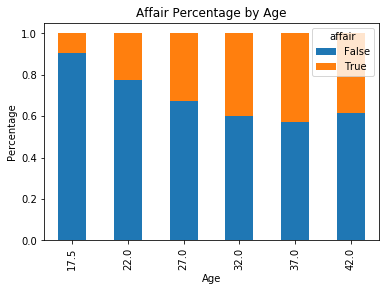

In [78]:
#Stacked barplot to look at the percentage of women having affairs by Age.
affair_age = pd.crosstab(data.age, data.affair.astype(bool))
affair_age.div(affair_age.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Affair Percentage by Age')
plt.xlabel('Age')
plt.ylabel('Percentage')
plt.show()

In [86]:
#pivot table showing the Age and affair status

affair_children = pd.crosstab(data.children, data.affair.astype(bool))
affair_children

affair,False,True
children,,
0.0,1912,502
1.0,747,412
2.0,873,608
3.0,460,321
4.0,197,131
5.5,124,79


Text(0,0.5,'Percentage')

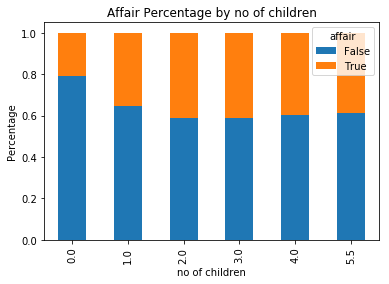

In [90]:
affair_children = pd.crosstab(data.children, data.affair.astype(bool))
affair_children.div(affair_children.sum(1).astype(float),axis=0).plot(kind='bar', stacked=True)
plt.title('Affair Percentage by no of children')
plt.xlabel('no of children')
plt.ylabel('Percentage')

## Creating Dummies
to create dummies of categorical numerical variables we have used patsy.dmatrices iso pandas.get_dummies  

In [91]:
y, X = dmatrices('affair ~ rate_marriage + age + yrs_married + children + religious + educ + C(occupation) + C(occupation_husb)',data, return_type="dataframe")

In [92]:
print(type(y))
print(type(X))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [94]:
y.head()

,affair
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0


In [95]:
X.head()

,Intercept,C(occupation)[T.2.0],C(occupation)[T.3.0],C(occupation)[T.4.0],C(occupation)[T.5.0],C(occupation)[T.6.0],C(occupation_husb)[T.2.0],C(occupation_husb)[T.3.0],C(occupation_husb)[T.4.0],C(occupation_husb)[T.5.0],C(occupation_husb)[T.6.0],rate_marriage,age,yrs_married,children,religious,educ
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,2.5,0.0,1.0,16.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.5,4.0,3.0,16.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,9.0,1.0,1.0,14.0


In [96]:
data.occupation.unique()

array([2., 3., 5., 4., 1., 6.])

In [97]:
data.occupation_husb.unique()

array([5., 4., 3., 2., 6., 1.])

### Renaming the dummy columns

In [98]:
X = X.rename(columns = {'C(occupation)[T.2.0]':'occ_2','C(occupation)[T.3.0]':'occ_3','C(occupation)[T.4.0]':'occ_4','C(occupation)[T.5.0]':'occ_5','C(occupation)[T.6.0]':'occ_6','C(occupation_husb)[T.2.0]':'occ_husb_2','C(occupation_husb)[T.3.0]':'occ_husb_3','C(occupation_husb)[T.4.0]':'occ_husb_4','C(occupation_husb)[T.5.0]':'occ_husb_5','C(occupation_husb)[T.6.0]':'occ_husb_6'})

In [99]:
X.head() #to check the columns name of X featuers

,Intercept,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,age,yrs_married,children,religious,educ
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,2.5,0.0,1.0,16.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.5,4.0,3.0,16.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,9.0,1.0,1.0,14.0


## Converting dataframe column to 1d array 
as to avoid any error or warning. It shoulld be noted that in sklearn y_train value is expected to be a 1 d array.

In [100]:
y=np.ravel(y)

In [101]:
X.shape

(6366, 17)

In [103]:
y.shape

(6366,)

## Stats model

In [104]:
import statsmodels.formula.api as smf
logit_model=smf.Logit(y,X)
result=logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.542911
         Iterations 6


In [105]:
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
================================================================
Model:              Logit            No. Iterations:   6.0000   
Dependent Variable: y                Pseudo R-squared: 0.137    
Date:               2018-08-15 15:09 AIC:              6946.3465
No. Observations:   6366             BIC:              7061.2449
Df Model:           16               Log-Likelihood:   -3456.2  
Df Residuals:       6349             LL-Null:          -4002.5  
Converged:          1.0000           Scale:            1.0000   
----------------------------------------------------------------
                 Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------------------------------
Intercept        2.9708   0.5722   5.1917 0.0000  1.8492  4.0923
occ_2            0.3902   0.4476   0.8719 0.3832 -0.4869  1.2674
occ_3            0.7027   0.4415   1.5917 0.1114 -0.1626  1.5679
occ_4            0.4714   0.4425   1.0652 0.2868 -0.3959  1.3387
occ_5            1.0542   0.4466   2.3603 0.0183  0.1788  1.9296
occ_6            1.1080   0.4942   2.2420 0.0250  0.1394  2.0767
occ_husb_2       0.1704   0.1861   0.9160 0.3597 -0.1943  0.5352
occ_husb_3       0.2842   0.2022   1.4057 0.1598 -0.1121  0.6804
occ_husb_4       0.1428   0.1810   0.7892 0.4300 -0.2119  0.4976
occ_husb_5       0.1723   0.1826   0.9436 0.3454 -0.1856  0.5303
occ_husb_6       0.1828   0.2037   0.8974 0.3695 -0.2164  0.5819
rate_marriage   -0.7102   0.0315 -22.5600 0.0000 -0.7719 -0.6485
age             -0.0613   0.0103  -5.9361 0.0000 -0.0815 -0.0410
yrs_married      0.1080   0.0110   9.8364 0.0000  0.0865  0.1295
children         0.0156   0.0321   0.4881 0.6255 -0.0472  0.0785
religious       -0.3754   0.0349 -10.7657 0.0000 -0.4437 -0.3070
educ            -0.0017   0.0174  -0.0992 0.9210 -0.0358  0.0324
================================================================

"""

## Train and Test set

In [106]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.25,random_state=102)

In [107]:
classifier=LogisticRegression() #classifier using Logistic regression

## Feature selection

In [121]:
affair=data.pop('affair')

In [122]:
data.columns

Index(['rate_marriage', 'age', 'yrs_married', 'children', 'religious', 'educ',
       'occupation', 'occupation_husb', 'affairs'],
      dtype='object')

In [123]:
data.drop(columns=['affairs'],axis=1,inplace=True) # after binary target variable is created we delete affairs variable

The goal of recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through a coef_ attribute or through a feature_importances_ attribute. Then, the least important features are pruned from current set of features. That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached. In this case we have taken 7 features to be selected for modelling. so out of 8 features one is having False(ranking_ 2) that means 4 th feature is not as useful as other and should be pruned.

In [124]:
# recursive feature elimination
from sklearn.feature_selection import RFE
rfe = RFE(classifier,7 )
rfe = rfe.fit(data,affair)
print(rfe.support_)
print(rfe.ranking_)



[ True  True  True False  True  True  True  True]
[1 1 1 2 1 1 1 1]


### NOTE: Here only 4 th feature is not useful for the model except it all should be included in the model

## SKlearn logistic model implementation


In [108]:
classifier.fit(X_train, y_train) # fitting the model using train set

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### Earlier we got a warning that "an nd array was to be passed  but a column vector found instead." so in order to make an nd array we had to  use np.ravel(y) to flatten the column as array.

In [109]:
y_pred= classifier.predict(X_test) # predicting test set 

In [110]:
y_pred # predicted 

array([0., 0., 0., ..., 0., 1., 1.])

In [111]:
from sklearn.metrics import accuracy_score

In [112]:
# accuracy 
accuracy_score(y_test,y_pred) 

0.7267587939698492

In [113]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(classifier.score(X_test,y_test )))  ### using logistic.score method

Accuracy of logistic regression classifier on test set: 0.73


## K fold cross validation K=10

### Accuarcy_score as primary meric

In [114]:
# kfold cross validation
import sklearn.model_selection as model_select
results = model_select.cross_val_score(classifier, X, y, cv=10, scoring='accuracy')


In [115]:
results

array([0.72100313, 0.70219436, 0.73824451, 0.70597484, 0.70597484,
       0.72955975, 0.7327044 , 0.70440252, 0.75157233, 0.75      ])

In [116]:
results.mean()

0.7241630685514876

### Confusion matrix

In [117]:
from sklearn.metrics import confusion_matrix
cmat=confusion_matrix(y_test,y_pred)
print(cmat)

[[965 111]
 [324 192]]


## Compute precision, recall, F-measure and support
The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier to not label a sample as positive if it is negative.

The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.

The F-beta score weights the recall more than the precision by a factor of beta. beta = 1.0 means recall and precision are equally important.

The support is the number of occurrences of each class in y_test.

In [118]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

        0.0       0.75      0.90      0.82      1076
        1.0       0.63      0.37      0.47       516

avg / total       0.71      0.73      0.70      1592



### ROC  AUC curve

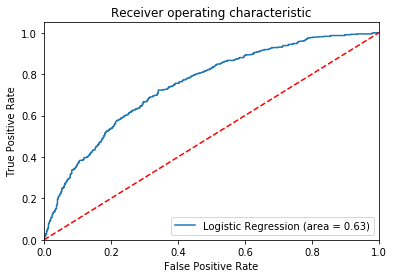

In [119]:
# Using ROC AUC curve to see how good  the model is.
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, classifier.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()